In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt_tab')

from sklearn.preprocessing import LabelEncoder
import string

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/devanshkumarverma/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [304]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [305]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2388,ham,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...,NaN,NaN,NaN
5184,ham,I'm in town now so i'll jus take mrt down later.,NaN,NaN,NaN
3636,ham,You know what hook up means right?,NaN,NaN,NaN
939,ham,Better. Made up for Friday and stuffed myself ...,NaN,NaN,NaN
3920,ham,Do 1 thing! Change that sentence into: \Becaus...,NaN,NaN,NaN


STEPS WE WILL FOLLOW :

        1: DATA CLEANING

        2: TEXT PRE PROCESSING

        3: EDA

        3: TRAINING

        5:EVALUATION

        6: IMPROVEMENT

        7:DEPLOYMENT IN WEB


#  Step 1

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [307]:
#columns'Unnamed: 2','Unnamed: 3','Unnamed: 4' seems to be almost competely null so we are dropping the columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [308]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [309]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [310]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [311]:
#encoding of target variable

enc=LabelEncoder()
df['target']=enc.fit_transform(df['target'])

In [312]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [313]:
#checking null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [314]:
#checking for duplicate values
df.duplicated().sum()

403

In [315]:
df.drop_duplicates(keep='first',inplace=True)

In [316]:
df.duplicated().sum()

0

# Step 2

In [317]:
''' 1: Lower case
    2: Tokenize
    3: Remove special characters
    4: Remove stopwords
    5: Remove punctuation
    '''


def text_preprocessing(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
            if i  not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
                y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(nltk.stem.porter.PorterStemmer().stem(i))

    return " ".join(y)

In [318]:
df['transformed_text']=df['text'].apply(text_preprocessing)

In [319]:
df

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


# Step 3

In [320]:
#adding no of char words and sentences as columns
df['num_char']=df['text'].apply(len)
df['num_word']=df['text'].apply((lambda x: len(nltk.word_tokenize(x))))
df['num_sen']=df['text'].apply((lambda x: len(nltk.sent_tokenize(x))))

In [321]:
df

,target,text,transformed_text,num_char,num_word,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111,24,2
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,61,15,1
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,b go esplanad fr home,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest,57,15,2
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...,125,27,1


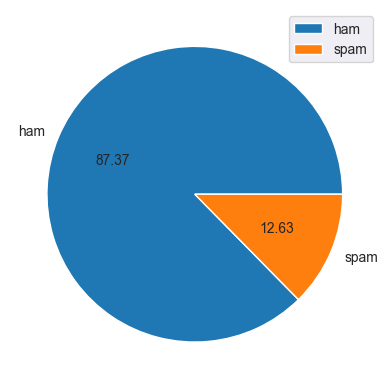

In [322]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.legend(['ham','spam'])
plt.show()

<Axes: >

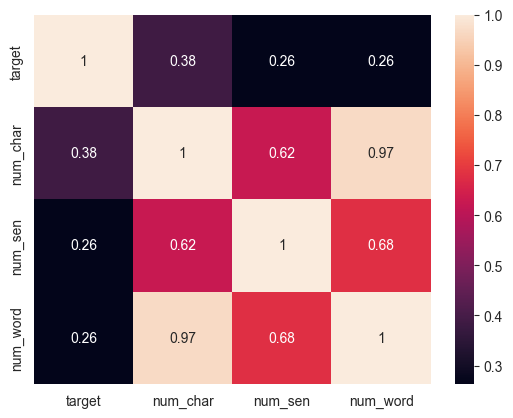

In [323]:
sns.heatmap(df[['target','num_char','num_sen','num_word']].corr(),annot=True)

<Axes: xlabel='num_char', ylabel='Count'>

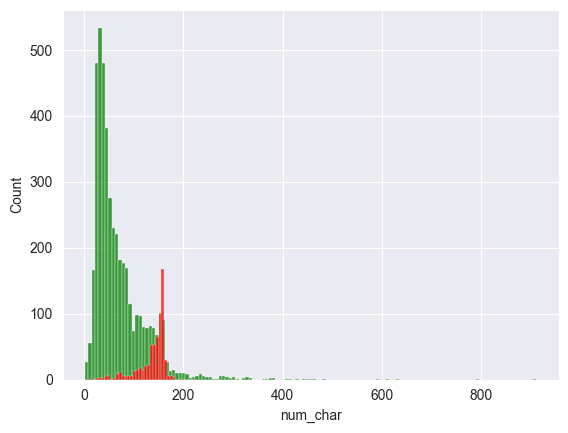

In [324]:
sns.histplot(df[df['target']==0]['num_char'],color='green')
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_sen', ylabel='Count'>

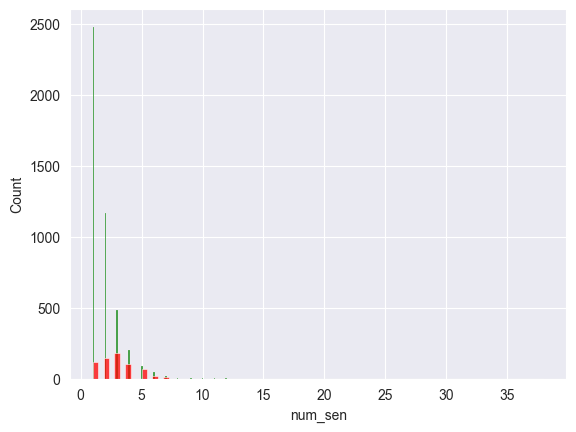

In [325]:
sns.histplot(df[df['target']==0]['num_sen'],color='green')
sns.histplot(df[df['target']==1]['num_sen'],color='red')

<Axes: xlabel='num_word', ylabel='Count'>

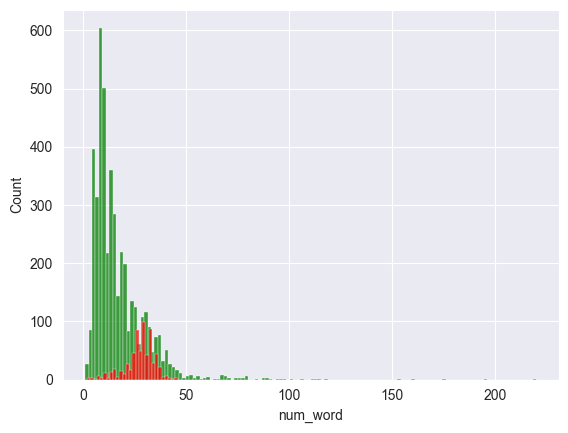

In [326]:
sns.histplot(df[df['target']==0]['num_word'],color='green')
sns.histplot(df[df['target']==1]['num_word'],color='red')

In [327]:
from wordcloud import WordCloud

In [328]:
wc=WordCloud(width=800, height=800,min_font_size=8,background_color='white')

In [329]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

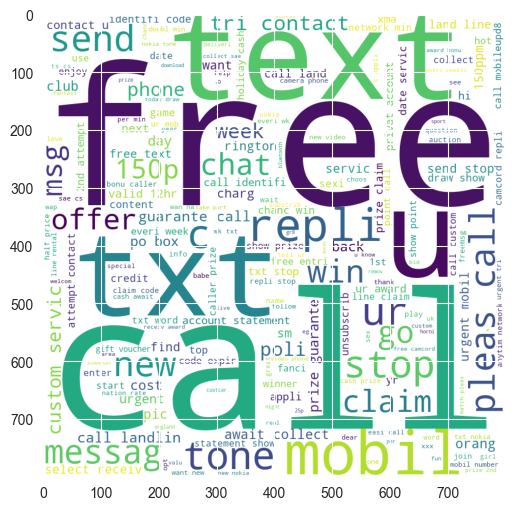

In [330]:
plt.figure(figsize=(6,6))
plt.imshow(spam_wc)

In [331]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

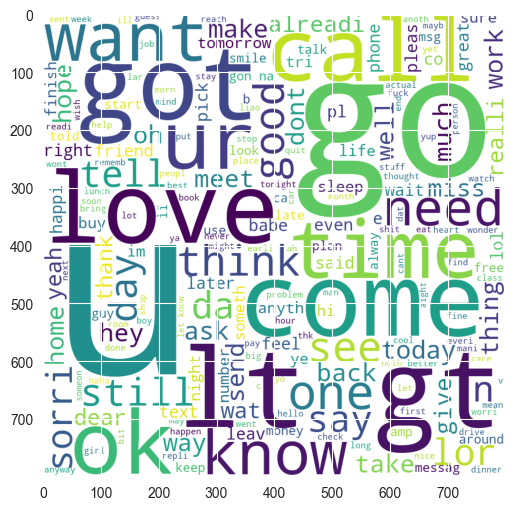

In [332]:
plt.figure(figsize=(6,6))
plt.imshow(ham_wc)

In [333]:
from collections import Counter
ham=[]

In [334]:
for msg in df[df['target']==0]['transformed_text'].tolist():
    for items in msg.split():
        ham.append(items)

In [335]:
len(ham)

35404

In [336]:
pd.DataFrame(Counter(ham).most_common(25))


,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [337]:
spam=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for items in msg.split():
        spam.append(items)

In [338]:
pd.DataFrame(Counter(spam).most_common(25))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


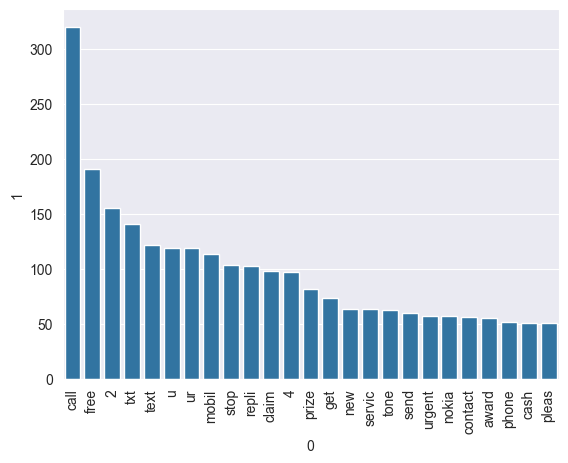

In [339]:
sns.barplot(x=pd.DataFrame(Counter(spam).most_common(25))[0],y=pd.DataFrame(Counter(spam).most_common(25))[1])
plt.xticks(rotation=90)
plt.show()

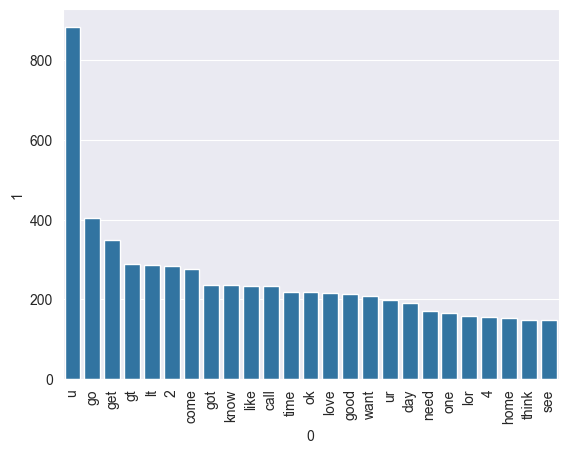

In [340]:
 sns.barplot(x=pd.DataFrame(Counter(ham).most_common(25))[0],y=pd.DataFrame(Counter(ham).most_common(25))[1])
plt.xticks(rotation=90)
plt.show()

# Step 4

In [341]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.model_selection import train_test_split



In [342]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
x = tfidf_vectorizer.fit_transform(df['transformed_text']).toarray()

In [343]:
y=df['target']

In [344]:
x.shape

(5169, 3000)

In [345]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score

In [346]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))


[[894   0]
 [ 27 113]]
0.9738878143133463
1.0


In [347]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

[[893   1]
 [ 20 120]]
0.9796905222437138
0.9917355371900827


In [348]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))


[[774 120]
 [ 22 118]]
0.8626692456479691
0.4957983193277311


In [349]:
import pickle
pickle.dump(tfidf_vectorizer,open('tfidf_vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
